In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier
from sklearn.neural_network import MLPClassifier

pd.set_option('display.max_columns', None)

In [2]:
"""
Dataset was taken from Kaggle and belongs to the UCI Machine Learning Repository.

There are 25 variables in the dataset, 
ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)
"""

df = pd.read_excel("default of credit card clients.xls", index_col=0, header=1)
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [3]:
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [4]:
pd.isnull(df).sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

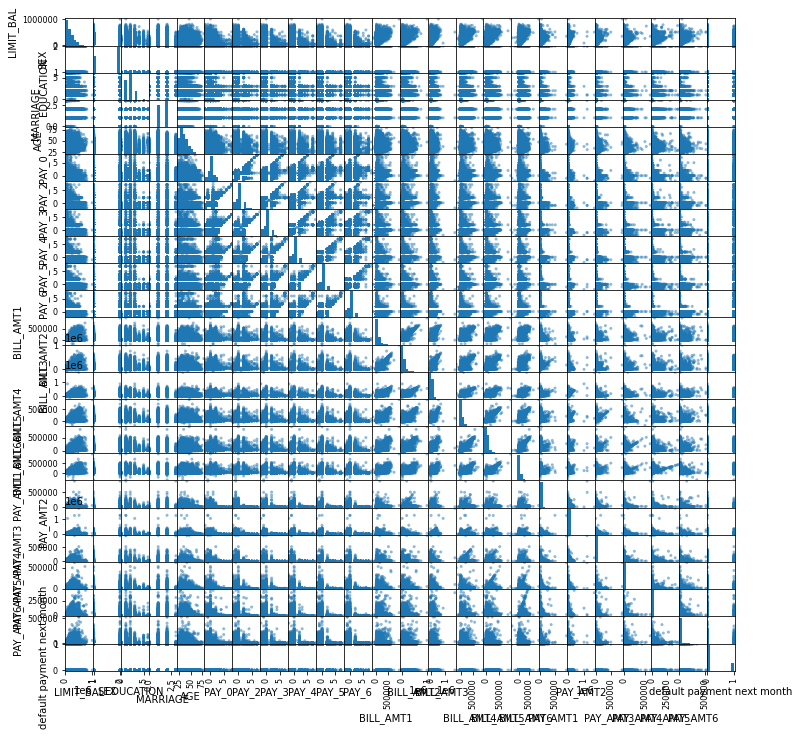

In [5]:
pd.plotting.scatter_matrix(df, figsize=(12,12))
plt.show()

In [6]:
dfCorr = df.corr('kendall')
dfCorr

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.047417,-0.208192,-0.093919,0.134720,-0.227908,-0.266910,-0.258264,-0.240874,-0.222620,-0.205973,0.072070,0.066737,0.071078,0.075267,0.078759,0.082700,0.203837,0.207038,0.211273,0.211733,0.218055,0.235511,-0.141088
SEX,0.047417,1.000000,0.014807,-0.031345,-0.076103,-0.048914,-0.067033,-0.062625,-0.056218,-0.049893,-0.040324,-0.033588,-0.032883,-0.024588,-0.018923,-0.012403,-0.008944,-0.003179,0.006643,0.017021,0.011295,0.012314,0.028147,-0.039961
EDUCATION,-0.208192,0.014807,1.000000,-0.153241,0.124254,0.115232,0.148733,0.142953,0.134448,0.121053,0.109514,0.073527,0.071532,0.063057,0.053477,0.046684,0.043386,-0.033051,-0.036948,-0.033489,-0.034800,-0.039690,-0.042589,0.042070
MARRIAGE,-0.093919,-0.031345,-0.153241,1.000000,-0.382704,0.021260,0.034135,0.038695,0.041556,0.043591,0.041088,0.002818,0.004555,0.002648,0.004644,0.002964,0.003889,-0.002846,-0.012449,-0.010308,-0.013154,-0.010669,-0.012345,-0.026330
AGE,0.134720,-0.076103,0.124254,-0.382704,1.000000,-0.048855,-0.064525,-0.064524,-0.062311,-0.064712,-0.059090,0.001636,0.001929,0.002171,-0.001097,0.001102,0.001442,0.024241,0.031485,0.024309,0.029107,0.027583,0.028097,0.004273
PAY_0,-0.227908,-0.048914,0.115232,0.021260,-0.048855,1.000000,0.602692,0.510743,0.477054,0.447236,0.423538,0.250380,0.254021,0.241922,0.235616,0.229515,0.221713,-0.074304,-0.049237,-0.042513,-0.027363,-0.021179,-0.035864,0.267885
PAY_2,-0.266910,-0.067033,0.148733,0.034135,-0.064525,0.602692,1.000000,0.763252,0.669012,0.627980,0.587823,0.439601,0.426305,0.399760,0.383089,0.368669,0.354546,0.016644,0.062375,0.065169,0.071812,0.075425,0.062086,0.201556
PAY_3,-0.258264,-0.062625,0.142953,0.038695,-0.064524,0.510743,0.763252,1.000000,0.765496,0.674627,0.625556,0.400381,0.455018,0.435027,0.412398,0.393582,0.376063,0.171962,0.027046,0.077231,0.090611,0.095058,0.074680,0.181077
PAY_4,-0.240874,-0.056218,0.134448,0.041556,-0.062311,0.477054,0.669012,0.765496,1.000000,0.788846,0.688069,0.391805,0.430690,0.484786,0.468477,0.439942,0.417405,0.145066,0.196177,0.050076,0.110569,0.125330,0.110113,0.162047
PAY_5,-0.222620,-0.049893,0.121053,0.043591,-0.064712,0.447236,0.627980,0.674627,0.788846,1.000000,0.786865,0.383563,0.416302,0.458903,0.515120,0.492981,0.457454,0.137427,0.174325,0.206366,0.080679,0.143943,0.133988,0.148829


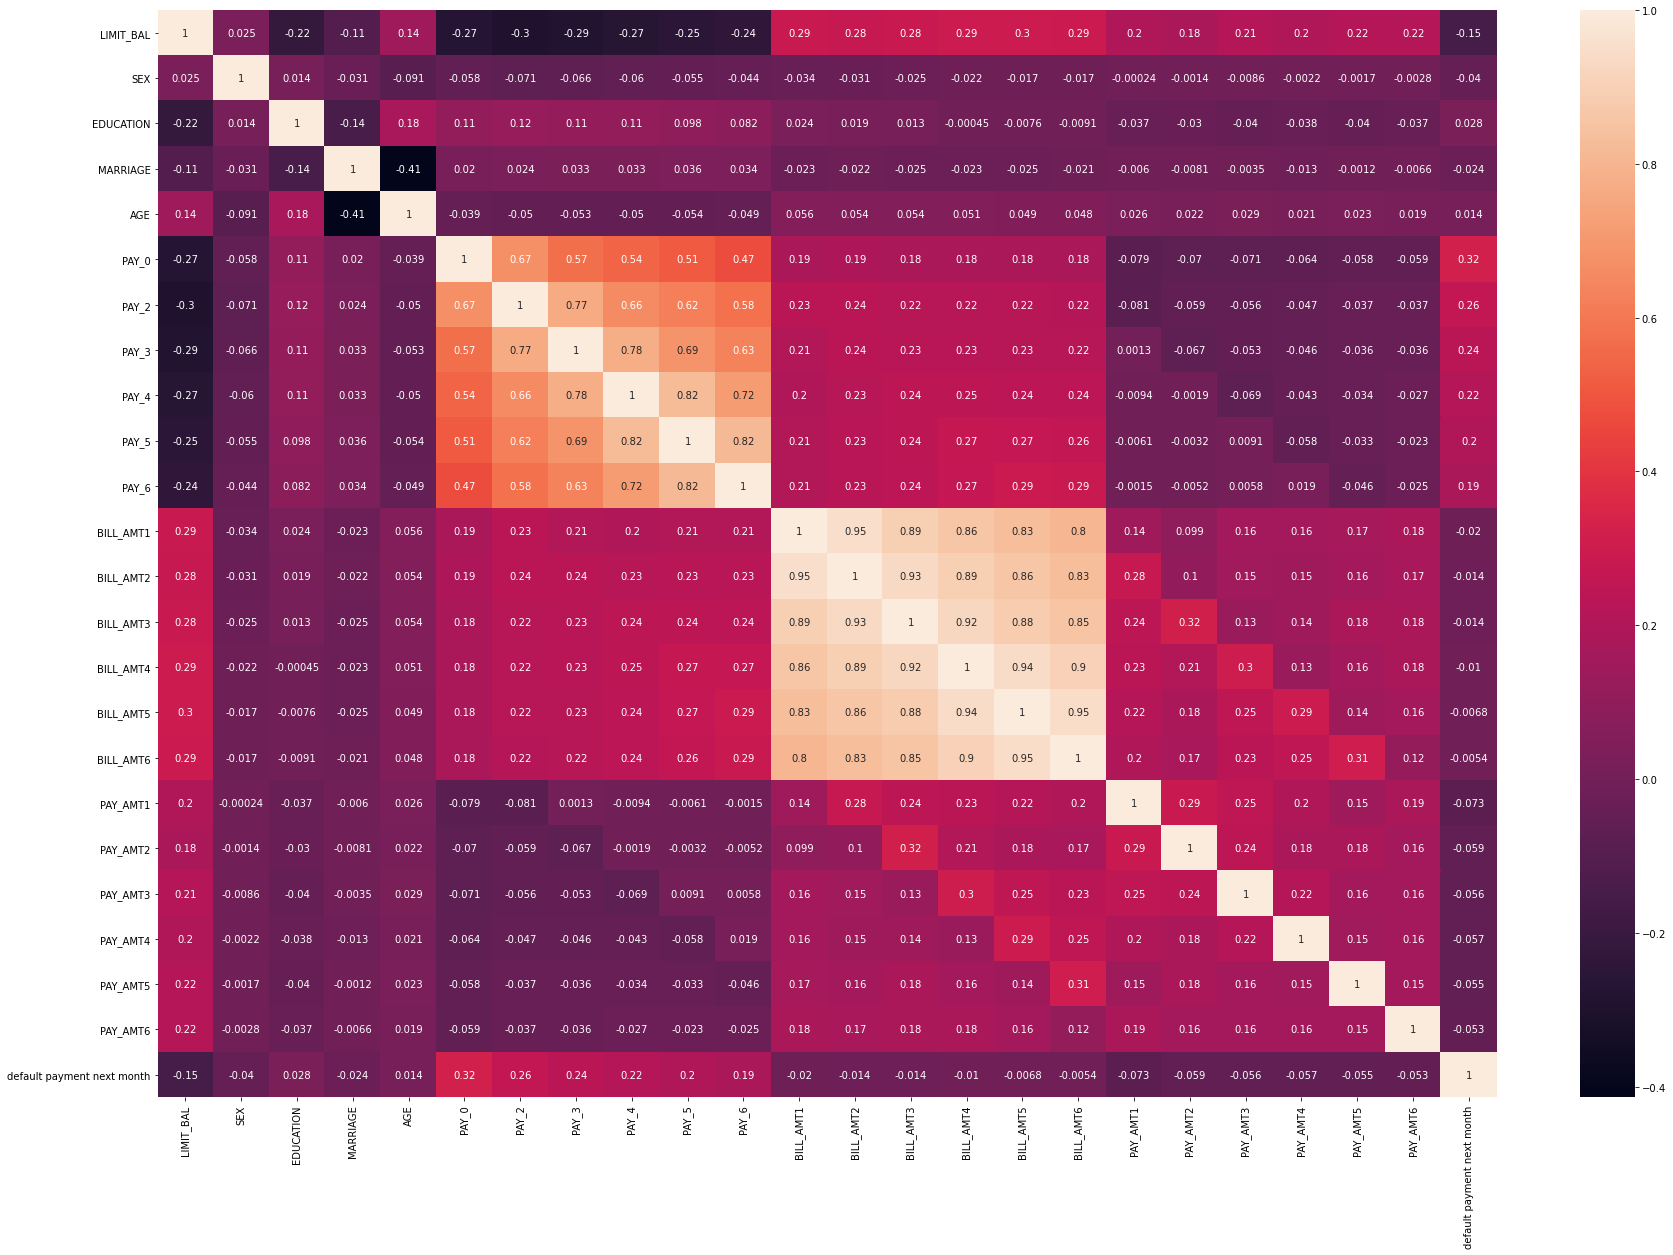

In [7]:
plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
dfx = df.iloc[:, :-1]
dfy = df["default payment next month"]

In [9]:
dfx

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [10]:
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.4, random_state=0)

In [11]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [12]:
linreg.intercept_

0.3346744896017567

In [13]:
linreg.coef_

array([-8.69798646e-08, -1.59123130e-02, -1.91526347e-02, -3.01546613e-02,
        1.50296082e-03,  8.78965148e-02,  2.47911935e-02,  1.02830290e-02,
       -2.26179574e-03,  5.37554256e-03,  9.71273015e-03, -6.76008757e-07,
        1.44334649e-07, -4.59958427e-08,  8.03690739e-08, -1.88088619e-07,
        2.93854636e-07, -7.46422016e-07, -7.81911348e-08, -2.36346843e-07,
       -1.91907129e-07, -4.21949136e-07, -2.24954006e-07])

In [14]:
pd.DataFrame(linreg.coef_, dfx.columns, ['Regression Coeffs'])

,Regression Coeffs
LIMIT_BAL,-8.697986e-08
SEX,-1.591231e-02
EDUCATION,-1.915263e-02
MARRIAGE,-3.015466e-02
AGE,1.502961e-03
PAY_0,8.789651e-02
PAY_2,2.479119e-02
PAY_3,1.028303e-02
PAY_4,-2.261796e-03
PAY_5,5.375543e-03


In [15]:
y_predicted = linreg.predict(x_test)

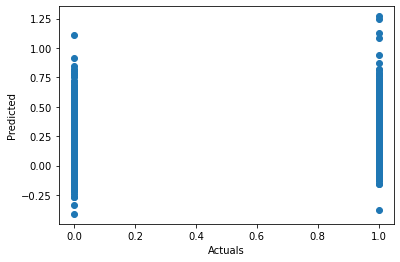

In [16]:
plt.scatter(y_test, y_predicted);
plt.xlabel("Actuals")
plt.ylabel("Predicted")
plt.show()

In [17]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predicted)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_predicted)
print("R-squared (R2) score:", r2)

Mean Squared Error: 0.14836272890896746
R-squared (R2) score: 0.12389733968155103


In [18]:
#Linear regression does not work as effectively for a classification problem like this one

## Logistic Regression

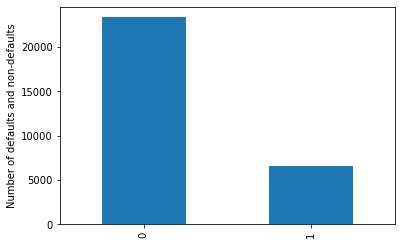

In [19]:
df["default payment next month"].value_counts().plot(kind="bar")
plt.ylabel("Number of defaults and non-defaults")
plt.show()

In [20]:
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

/Users/nickghalami/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_predicted_classification = logreg.predict(x_test)

In [22]:
pd.Series(y_predicted_classification).value_counts()

0    11998
1        2
dtype: int64

In [23]:
logreg.score(x_test, y_test)

0.784

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted_classification))
print(confusion_matrix(y_predicted_classification, y_test))
print('\nAccuracy Score for model: ', accuracy_score(y_predicted_classification,y_test))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      9408
           1       0.50      0.00      0.00      2592

    accuracy                           0.78     12000
   macro avg       0.64      0.50      0.44     12000
weighted avg       0.72      0.78      0.69     12000

[[9407 2591]
 [   1    1]]

Accuracy Score for model:  0.784


In [25]:
# Lets see if reducing the number of predictors will help improve performance

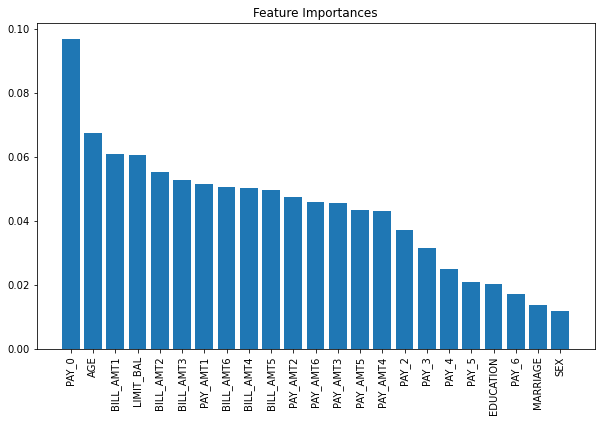

In [26]:
rf = RandomForestClassifier()
rf.fit(dfx, dfy)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(dfx.shape[1]), importances[indices])
plt.xticks(range(dfx.shape[1]), dfx.columns[indices], rotation=90)
plt.title("Feature Importances")
plt.show()

In [27]:
# We will remake the test/train datasets based on the importance of specific variables while also removing variables 
# that have high collinearity

dfx = df[["PAY_0", "AGE", "BILL_AMT1", "EDUCATION", 'SEX', 'MARRIAGE']]
dfy = df["default payment next month"]

x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.4, random_state=0)

In [28]:
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

LogisticRegression()

In [29]:
y_predicted_classification = logreg.predict(x_test)

In [30]:
pd.Series(y_predicted_classification).value_counts()

0    12000
dtype: int64

In [31]:
logreg.score(x_test, y_test)

0.784

In [32]:
print(classification_report(y_test, y_predicted_classification))
print(confusion_matrix(y_predicted_classification, y_test))
print('\nAccuracy Score for model: ', accuracy_score(y_predicted_classification,y_test))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      9408
           1       0.00      0.00      0.00      2592

    accuracy                           0.78     12000
   macro avg       0.39      0.50      0.44     12000
weighted avg       0.61      0.78      0.69     12000

[[9408 2592]
 [   0    0]]

Accuracy Score for model:  0.784


/Users/nickghalami/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nickghalami/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nickghalami/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Ridge Classifier

In [33]:
rc = RidgeClassifier()
rc.fit(x_train, y_train)

y_pred = rc.predict(x_test)
y_train_pred = rc.predict(x_train)

In [34]:
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model_rc: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model_rc: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88     11668
           1       0.09      0.73      0.17       332

    accuracy                           0.80     12000
   macro avg       0.54      0.77      0.53     12000
weighted avg       0.97      0.80      0.86     12000

[[9319 2349]
 [  89  243]]

Test Accuracy Score for model_rc:  0.7968333333333333

Train Accuracy Score for model_rc:  0.7859444444444444


## Random Forests

In [35]:
randomforest = RandomForestClassifier(n_estimators=350, min_samples_split=30, random_state=0)
randomforest.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=30, n_estimators=350, random_state=0)

In [36]:
randomforest.score(x_test, y_test)

0.8245

In [37]:
y_pred = randomforest.predict(x_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model_rf: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model_rf: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90     10782
           1       0.33      0.70      0.45      1218

    accuracy                           0.82     12000
   macro avg       0.64      0.77      0.67     12000
weighted avg       0.90      0.82      0.85     12000

[[9042 1740]
 [ 366  852]]

Test Accuracy Score for model_rf:  0.8245

Train Accuracy Score for model_rf:  0.7859444444444444


## Neural Network

In [38]:
from sklearn.preprocessing import StandardScaler
# ANN's are very sensitive to large numbers, so we scale them
scaler = StandardScaler()
scaler.fit(dfx)

scaled_features = scaler.transform(dfx)
dfscaledx = pd.DataFrame(scaled_features, columns=dfx.columns)
dfscaledx.head()

,PAY_0,AGE,BILL_AMT1,EDUCATION,SEX,MARRIAGE
0,1.794564,-1.246020,-0.642501,0.185828,0.810161,-1.057295
1,-0.874991,-1.029047,-0.659219,0.185828,0.810161,0.858557
2,0.014861,-0.161156,-0.298560,0.185828,0.810161,0.858557
3,0.014861,0.164303,-0.057491,0.185828,0.810161,-1.057295
4,-0.874991,2.334029,-0.578618,0.185828,-1.234323,-1.057295


In [39]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6,6), random_state=25)
clf.fit(x_train, y_train)

/Users/nickghalami/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 6), random_state=25,
              solver='lbfgs')

In [40]:
y_pred = clf.predict(x_test)
clf.score(x_test, y_test)

0.7839166666666667

In [41]:
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model_nn: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model_nn: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88     11999
           1       0.00      0.00      0.00         1

    accuracy                           0.78     12000
   macro avg       0.50      0.39      0.44     12000
weighted avg       1.00      0.78      0.88     12000

[[9407 2592]
 [   1    0]]

Test Accuracy Score for model_nn:  0.7839166666666667

Train Accuracy Score for model_nn:  0.7859444444444444
